# BME3508 – Module 2 Example

## Periodic Signal Analysis

This notebook analyzes a periodic signal with exponential decay segments. The signal has the following characteristics:

- Period: 2π
- Amplitude: 1 unit
- Exponential decay: e^(-t/2)
- Discontinuities at t = -2π, -π, 0, π, 2π


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def periodic_exp_decay(t):
    """Generate periodic exponential decay signal"""
    # Normalize t to [-2π, 2π]
    t_norm = t % (2*np.pi)
    if t_norm > np.pi:
        t_norm -= 2*np.pi
    
    # Calculate exponential decay
    return np.exp(-t_norm/2)

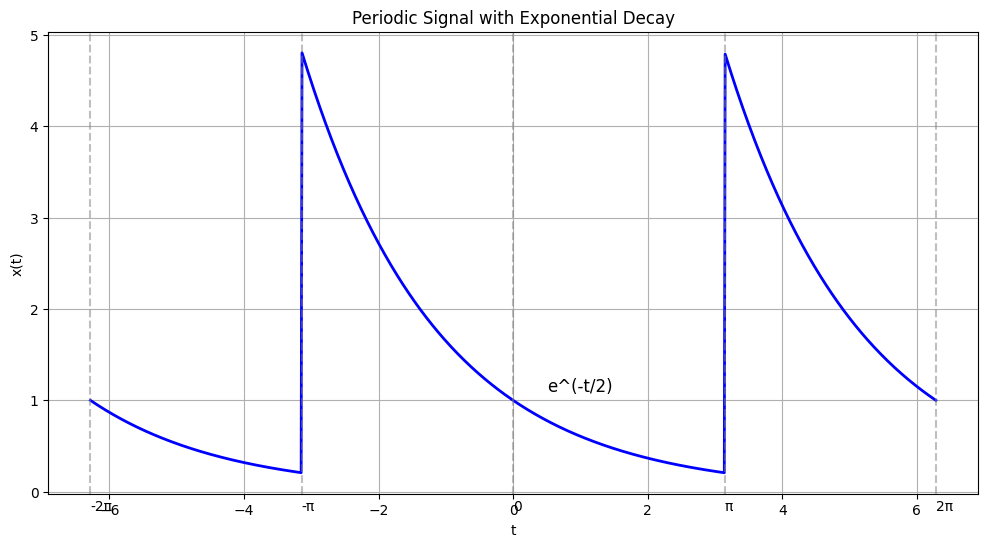

In [ ]:
# Generate time points
t = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Calculate signal values
x = np.array([periodic_exp_decay(ti) for ti in t])

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(t, x, 'b-', linewidth=2)

# Add vertical lines at discontinuities
for ti in [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]:
    plt.axvline(x=ti, color='gray', linestyle='--', alpha=0.5)

# Add labels and grid
plt.grid(True)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Periodic Signal with Exponential Decay')

# Add text annotations
plt.text(-2*np.pi, -0.2, '-2π')
plt.text(-np.pi, -0.2, '-π')
plt.text(0, -0.2, '0')
plt.text(np.pi, -0.2, 'π')
plt.text(2*np.pi, -0.2, '2π')
plt.text(0.5, 1.1, 'e^(-t/2)', fontsize=12)

plt.show()

## Signal Analysis

The signal shown above has the following key features:

1. It is periodic with period T = 2π
2. Each segment follows an exponential decay e^(-t/2)
3. The signal resets to 1 at t = -2π, -π, 0, π, 2π
4. The signal is discontinuous at these points

This type of signal is commonly found in systems with periodic reset behavior, such as:

- Relaxation oscillators
- Sawtooth wave generators
- Certain types of biological rhythms


$$
x(t) = \frac{a_0}{2} \;+\; \sum_{k=1}^\infty \Bigl[a_k \cos\bigl(k \,\omega_0\, t\bigr) \;+\; b_k \sin\bigl(k \,\omega_0\, t\bigr)\Bigr],
$$

The factor of $\frac{1}{2}$ in the term $\frac{a_0}{2}$ arises because the Fourier series represents the average value of the function over one period.
The coefficient $a_0$ is the average value of $x(t)$ over one period, and dividing it by 2 ensures that the constant term in the Fourier series
correctly represents this average value. This is a standard convention in the Fourier series representation.


## Calculation of $(a_0)$

We have a periodic function $(x(t))$ with period $(T = \pi)$. In the standard trigonometric Fourier series form:

$$
x(t) = \frac{a_0}{2} \;+\; \sum_{k=1}^\infty \Bigl[a_k \cos\bigl(k \,\omega_0\, t\bigr) \;+\; b_k \sin\bigl(k \,\omega_0\, t\bigr)\Bigr],
$$

the DC (constant) coefficient $(a_0)$ is given by:

$$
a_0 = \frac{2}{T} \int_{0}^{T} x(t)\,\mathrm{d}t.
$$

Since $(T = \pi)$, we have:

$$
a_0 = \frac{2}{\pi} \int_{0}^{\pi} x(t)\,\mathrm{d}t.
$$

---

### Substituting $(x(t) = e^{-\tfrac{t}{2}})$

Over one period $([0, \pi])$, let $(x(t) = e^{-\tfrac{t}{2}})$. Then

$$
a_0
= \frac{2}{\pi} \int_{0}^{\pi} e^{-\frac{t}{2}} \,\mathrm{d}t.
$$

---

### Evaluating the integral

We use the fact:

$$
\int e^{-\frac{t}{2}}\,\mathrm{d}t
= -2\,e^{-\frac{t}{2}} + C.
$$

Hence,

$$
\int_{0}^{\pi} e^{-\frac{t}{2}} \,\mathrm{d}t
=
\Bigl[-2\,e^{-\frac{t}{2}}\Bigr]_{0}^{\pi}
=
\Bigl(-2\,e^{-\frac{\pi}{2}}\Bigr) - \Bigl(-2 \cdot 1\Bigr)
= 2\,\Bigl(1 - e^{-\frac{\pi}{2}}\Bigr).
$$

---

### Final expression for $(a_0)$

Multiply by $(\tfrac{2}{\pi})$:

$$
a_0
=
\frac{2}{\pi} \times 2\,\bigl(1 - e^{-\tfrac{\pi}{2}}\bigr)
=
\frac{4\,\bigl(1 - e^{-\tfrac{\pi}{2}}\bigr)}{\pi}.
$$

Thus, the DC coefficient is:

$$
\boxed{\,a_0
=
\frac{4\,\bigl(1 - e^{-\frac{\pi}{2}}\bigr)}{\pi}\,}.
$$


In [7]:
a0=4*(1-np.exp(-np.pi/2))/np.pi/2
print(a0)

1.00855904758258


## Derivation of $a_k$ via Integration by Parts

Below, we derive the coefficient $a_k$ in the real (trigonometric) Fourier series for the function

$$
x(t) = e^{-\tfrac{t}{2}}, \quad t \in [0, \pi],
$$

extended periodically with period $\pi$.

---

### 1. Formula for $a_k$

For a signal with period $T = \pi$, the fundamental frequency is

$$
\omega_0 = \frac{2\pi}{T} = 2.
$$

In the standard trigonometric Fourier series of the form

$$
x(t)
= \frac{a_0}{2}
+ \sum_{k=1}^\infty \Bigl[a_k \cos(k \,\omega_0 \, t) + b_k \sin(k \,\omega_0 \, t)\Bigr],
$$

the cosine coefficients $a_k$ (for $k \ge 1$) are given by

$$
a_k
= \frac{2}{\pi} \int_{0}^{\pi} x(t)\,\cos\bigl(k \,\omega_0 \, t\bigr)\,dt.
$$

Since $\omega_0 = 2$, we have

$$
a_k
= \frac{2}{\pi}
\int_{0}^{\pi} e^{-\frac{t}{2}} \cos\bigl(2k\,t\bigr)\,dt.
$$

---

### 2. Define the integral to be solved

Let

$$
I_{\cos}
=
\int_{0}^{\pi} e^{-\frac{t}{2}} \,\cos\bigl(2k\,t\bigr)\,dt.
$$

Then

$$
a_k
=
\frac{2}{\pi}\, I_{\cos}.
$$

---

### 3. Integration by parts (first step)

Set

$$
p = \tfrac12,
\quad
q = 2k.
$$

Thus,

$$
I_{\cos}
= \int_{0}^{\pi} e^{-p t}\,\cos(q\,t)\,dt.
$$

We apply integration by parts:

- Let $u = \cos(q\,t)$. Then $du = -\,q\,\sin(q\,t)\,dt.$
- Let $dv = e^{-p\,t}\,dt$. Then $v = -\frac{1}{p} \, e^{-p\,t}$.

Hence,

$$
\int u\,dv
=
u\,v \;-\; \int v\,du,
$$

so

$$
I_{\cos}
=
\bigl[\cos(q\,t)\bigr]\Bigl(-\tfrac{1}{p}\,e^{-p\,t}\Bigr)
-
\int \Bigl(-\tfrac{1}{p}\,e^{-p\,t}\Bigr)\bigl(-\,q\,\sin(q\,t)\bigr)\,dt.
$$

Simplify:

$$
I_{\cos}
=
-\,\frac{1}{p}\,e^{-p\,t}\,\cos(q\,t)
-
\int \frac{q}{p}\,e^{-p\,t}\,\sin(q\,t)\,dt.
$$

Define

$$
I_{\sin}
=
\int e^{-p\,t}\,\sin(q\,t)\,dt.
$$

Then

$$
I_{\cos}
=
-\,\frac{1}{p}\,e^{-p\,t}\,\cos(q\,t)
-
\frac{q}{p}\,I_{\sin}.
\quad (1)
$$

---

### 4. Integration by parts for $I_{\sin}$

Now,

$$
I_{\sin}
=
\int e^{-p\,t}\,\sin(q\,t)\,dt.
$$

We do another integration by parts:

- Let $u = \sin(q\,t)$. Then $du = q\,\cos(q\,t)\,dt.$
- Let $dv = e^{-p\,t}\,dt$. Then $v = -\tfrac{1}{p}\,e^{-p\,t}$.

Hence,

$$
I_{\sin}
=
\sin(q\,t)\Bigl(-\tfrac{1}{p}\,e^{-p\,t}\Bigr)
-
\int \Bigl(-\tfrac{1}{p}\,e^{-p\,t}\Bigr)\bigl(q\,\cos(q\,t)\bigr)\,dt.
$$

Thus,

$$
I_{\sin}
=
-\,\frac{1}{p}\,e^{-p\,t}\,\sin(q\,t)
+
\frac{q}{p}\,\int e^{-p\,t}\,\cos(q\,t)\,dt.
$$

But the remaining integral is $I_{\cos}$. So

$$
I_{\sin}
=
-\,\frac{1}{p}\,e^{-p\,t}\,\sin(q\,t)
+
\frac{q}{p}\,I_{\cos}.
\quad (2)
$$


### 5. Solve for $I_{\cos}$

We want to solve for the indefinite integral
$I_{\cos} \;=\; \int e^{-p\,t}\,\cos(q\,t)\,dt$
given the coupled equations:

1. $I_{\cos} = -\tfrac{1}{p}\,e^{-p\,t}\,\cos(q\,t) \;-\;\tfrac{q}{p}\,I_{\sin},$
2. $I_{\sin} = -\tfrac{1}{p}\,e^{-p\,t}\,\sin(q\,t) \;+\;\tfrac{q}{p}\,I_{\cos}.$

---

### 5a. Express $I_{\sin}$ in Terms of $I_{\cos}$

From equation (2):

$$
I_{\sin}
= -\,\frac{1}{p}\,e^{-p\,t}\,\sin(q\,t)
+ \frac{q}{p}\,I_{\cos}.
$$

Rearranging slightly,

$$
I_{\sin}
= \frac{q}{p}\,I_{\cos}
- \frac{1}{p}\,e^{-p\,t}\,\sin(q\,t).
\quad (2')
$$

---

### 5b. Substitute into the $I_{\cos}$ Equation

Plug (2') into equation (1):

$$
I_{\cos}
= -\,\frac{1}{p}\,e^{-p\,t}\,\cos(q\,t)
- \frac{q}{p}\Bigl[\underbrace{\tfrac{q}{p}\,I_{\cos}
- \tfrac{1}{p}\,e^{-p\,t}\,\sin(q\,t)}_{I_{\sin}}\Bigr].
$$

Distribute $-\,\tfrac{q}{p}$:

$$
I_{\cos}
= -\,\frac{1}{p}\,e^{-p\,t}\,\cos(q\,t)
- \frac{q}{p}\,\frac{q}{p}\,I_{\cos}
+ \frac{q}{p}\,\frac{1}{p}\,e^{-p\,t}\,\sin(q\,t).
$$

This simplifies to:

$$
I_{\cos}
= -\,\frac{1}{p}\,e^{-p\,t}\,\cos(q\,t)
- \frac{q^2}{p^2}\,I_{\cos}
+ \frac{q}{p^2}\,e^{-p\,t}\,\sin(q\,t).
$$

---

### 5c. Collect $I_{\cos}$ Terms

Group all $I_{\cos}$ on one side:

$$
I_{\cos} + \frac{q^2}{p^2}\,I_{\cos}
= -\,\frac{1}{p}\,e^{-p\,t}\,\cos(q\,t)
+ \frac{q}{p^2}\,e^{-p\,t}\,\sin(q\,t).
$$

Factor out $I_{\cos}$:

$$
\Bigl(1 + \frac{q^2}{p^2}\Bigr)\,I_{\cos}
= e^{-p\,t}\Bigl(-\,\frac{1}{p}\,\cos(q\,t) + \frac{q}{p^2}\,\sin(q\,t)\Bigr).
$$

Notice $1 + \tfrac{q^2}{p^2} = \tfrac{p^2 + q^2}{p^2}$. Thus,

$$
\frac{p^2 + q^2}{p^2}\,I_{\cos}
= e^{-p\,t}\Bigl(-\,\frac{1}{p}\,\cos(q\,t) + \frac{q}{p^2}\,\sin(q\,t)\Bigr).
$$

Multiply both sides by $\tfrac{p^2}{p^2 + q^2}$:

$$
I_{\cos}
= \frac{p^2}{p^2 + q^2}\,e^{-p\,t}
\Bigl(-\,\frac{1}{p}\,\cos(q\,t) + \frac{q}{p^2}\,\sin(q\,t)\Bigr).
$$

---

### 5d. Simplify

Inside the parentheses:

- $\displaystyle \tfrac{p^2}{p^2 + q^2} \times \Bigl(-\tfrac{1}{p}\Bigr) = -\,\tfrac{p}{p^2 + q^2}.$
- $\displaystyle \tfrac{p^2}{p^2 + q^2} \times \tfrac{q}{p^2} = \tfrac{q}{p^2 + q^2}.$

Hence the bracket becomes $-\,p\,\cos(q\,t) + q\,\sin(q\,t)$, leading to:

$$
I_{\cos}
= \frac{e^{-p\,t}}{p^2 + q^2}\Bigl(-\,p\,\cos(q\,t) + q\,\sin(q\,t)\Bigr) + C.
$$

---

### 5e. Final Indefinite Integral

Thus, we have shown:

$$
\boxed{
I_{\cos}
= \int e^{-p\,t}\,\cos(q\,t)\,dt
= \frac{e^{-p\,t}}{p^2 + q^2}\Bigl(-\,p\,\cos(q\,t) + q\,\sin(q\,t)\Bigr) + C.
}
$$


---

### 6. Evaluate from 0 to $\pi$

We need the definite integral:

$$
I_{\cos}[0,\pi]
=
\left.
\frac{e^{-p\,t}}{p^2 + q^2}
\Bigl(-p\,\cos(q\,t) + q\,\sin(q\,t)\Bigr)
\right|_{t=0}^{t=\pi}.
$$

Recall $p = \tfrac12, \; q = 2k$.

- **At $t=\pi$:**

  $$
  e^{-p\,\pi} = e^{-\frac{\pi}{2}},
  \quad
  \cos\bigl(q\,\pi\bigr) = \cos(2k\,\pi) = 1,
  \quad
  \sin\bigl(2k\,\pi\bigr) = 0.
  $$

  So the expression becomes

  $$
  \frac{e^{-\frac{\pi}{2}}}{(\tfrac12)^2 + (2k)^2}
  \Bigl(-\tfrac12 \cdot 1 + 2k\cdot 0\Bigr)
  =
  -\,\frac{\frac12\,e^{-\frac{\pi}{2}}}{\frac{1}{4} + 4k^2}.
  $$

- **At $t=0$:**

  $$
  e^{0} = 1,\quad \cos(0)=1,\quad \sin(0)=0.
  $$

  So

  $$
  \frac{1}{\frac{1}{4} + 4k^2}
  \Bigl(-\tfrac12 \cdot 1 + 2k\cdot0\Bigr)
  =
  -\,\frac{\tfrac12}{\frac{1}{4} + 4k^2}.
  $$

Hence,

$$
I_{\cos}[0,\pi]
=
\Bigl[-\,\frac{1}{2}\,\frac{e^{-\frac{\pi}{2}}}{\tfrac14 + 4k^2}\Bigr]
\;-\;
\Bigl[-\,\frac{1}{2}\,\frac{1}{\tfrac14 + 4k^2}\Bigr]
=
-\,\frac{1}{2}\,\frac{e^{-\frac{\pi}{2}}}{\tfrac14 + 4k^2}
+
\frac{1}{2}\,\frac{1}{\tfrac14 + 4k^2}.
$$

Factor out $\tfrac{1}{2(\tfrac14 + 4k^2)}$:

$$
I_{\cos}[0,\pi]
=
\frac{1}{2\bigl(\tfrac14 + 4k^2\bigr)}
\Bigl[\,1 - e^{-\frac{\pi}{2}}\Bigr].
$$

Noting $\tfrac14 + 4k^2 = \tfrac{1 + 16k^2}{4}$, we get

$$
I_{\cos}[0,\pi]
=
\frac{2\bigl(1 - e^{-\frac{\pi}{2}}\bigr)}{1 + 16k^2}.
$$


---

### 7. Multiply by $\tfrac{2}{\pi}$ to obtain $a_k$

Finally,

$$
a_k
= \frac{2}{\pi} \, I_{\cos}[0,\pi]
=
\frac{2}{\pi}
\times
\frac{2\bigl(1 - e^{-\frac{\pi}{2}}\bigr)}{1 + 16k^2}
=
\frac{4\bigl(1 - e^{-\frac{\pi}{2}}\bigr)}{\pi\bigl(1 + 16k^2\bigr)}.
$$

Thus,

$$
\boxed{
a_k
=
\frac{4\,\bigl(1 - e^{-\frac{\pi}{2}}\bigr)}{\pi\bigl(1 + 16k^2\bigr)}
\quad (k \ge 1).
}
$$


In [16]:
k=2
a1 = 4 * (1 - np.exp(-np.pi / 2)) /np.pi / (1 + 16 * k**2)
a1

np.float64(0.015516293039732001)

In [17]:
k=2
0.504*(2/(1+16*k**2))
# 2
# 1+16n2

0.01550769230769231

## Derivation of $b_k$

We now derive the sine‐coefficient $b_k$ in the real (trigonometric) Fourier series. Just like for $a_k$, we start with the integral

$$
b_k
\;=\; \frac{2}{\pi} \int_{0}^{\pi} e^{-\tfrac{t}{2}} \,\sin\bigl(2k\,t\bigr)\,dt.
$$

Define

$$
I_{\sin}
\;=\;
\int e^{-p\,t}\,\sin(q\,t)\,dt,
$$

where again we set $p = \tfrac12$ and $q = 2k$. Then

$$
b_k
\;=\;
\frac{2}{\pi}\,
\int_{0}^{\pi} e^{-\tfrac{t}{2}}\;\sin\bigl(2k\,t\bigr)\,dt
\;=\;
\frac{2}{\pi}\,I_{\sin}\Bigl[0,\pi\Bigr].
$$

---


### 1. Integration by parts for $I_{\sin}$

1. Let
   $$
   u = \sin(q\,t),
   \quad
   dv = e^{-p\,t}\,dt.
   $$
2. Then
   $$
   du = q\,\cos(q\,t)\,dt,
   \quad
   v = \int e^{-p\,t}\,dt = -\,\frac{1}{p}\,e^{-p\,t}.
   $$
3. Hence,
   $$
   I_{\sin}
   \;=\;
   \int e^{-p\,t}\,\sin(q\,t)\,dt
   \;=\;
   u\,v - \int v\,du
   \;=\;
   \sin(q\,t)\Bigl(-\tfrac{1}{p}e^{-p\,t}\Bigr)
   -
   \int \Bigl(-\tfrac{1}{p}e^{-p\,t}\Bigr)\,\bigl(q\,\cos(q\,t)\bigr)\,dt.
   $$
4. Simplify:

   $$
   I_{\sin}
   = -\,\frac{1}{p}\,e^{-p\,t}\,\sin(q\,t)
   \;+\;
   \frac{q}{p}\,\int e^{-p\,t}\,\cos(q\,t)\,dt.
   $$

   But
   $\displaystyle \int e^{-p\,t}\,\cos(q\,t)\,dt$
   is exactly $I_{\cos}$, which we already know (or can find by a similar procedure).

If we **solve the two‐equation system** (like we did for $I_{\cos}$) or simply do a **second integration by parts** to handle that $\cos$ integral, we end up with the closed‐form:

$$
I_{\sin}
\;=\;
\int e^{-p\,t}\,\sin(q\,t)\,dt
\;=\;
\frac{e^{-p\,t}}{p^2 + q^2}
\Bigl(\,p\,\sin(q\,t)\;-\;q\,\cos(q\,t)\Bigr)
\;+\; C.
$$


---

### 2. Evaluate from 0 to $\pi$

For $p=\tfrac12$ and $q=2k$, we need

$$
I_{\sin}[0,\pi]
\;=\;
\left.
\frac{e^{-p\,t}}{p^2 + q^2}
\bigl(p\,\sin(q\,t)\;-\;q\,\cos(q\,t)\bigr)
\right|_{t=0}^{t=\pi}.
$$

- At $t=\pi$:

  $$
  e^{-p\,\pi} = e^{-\tfrac{\pi}{2}},\quad
  \sin(2k\,\pi)=0,\quad
  \cos(2k\,\pi)=1.
  $$

  so the expression becomes

  $$
  \frac{e^{-\tfrac{\pi}{2}}}{\tfrac14 + 4k^2}
  \bigl(\tfrac12\cdot0 - 2k\cdot1\bigr)
  =
  -\,\frac{2k\,e^{-\tfrac{\pi}{2}}}{\tfrac14+4k^2}.
  $$

- At $t=0$:
  $$\sin(0)=0,\;\cos(0)=1,\;e^0=1,$$
  so the expression is
  $$
  \frac{1}{\tfrac14 + 4k^2}
  \bigl(\tfrac12\cdot0 - 2k\cdot1\bigr)
  =
  -\,\frac{2k}{\tfrac14+4k^2}.
  $$

Hence,

$$
I_{\sin}[0,\pi]
=
\Bigl[-\,\frac{2k\,e^{-\tfrac{\pi}{2}}}{\tfrac14+4k^2}\Bigr]
\;-\;
\Bigl[-\,\frac{2k}{\tfrac14+4k^2}\Bigr]
=
\frac{2k}{\tfrac14+4k^2}\,\Bigl(1 - e^{-\tfrac{\pi}{2}}\Bigr).
$$

We can rewrite $\tfrac14+4k^2$ as $\tfrac{1+16k^2}{4}$, so

$$
I_{\sin}[0,\pi]
=
\frac{2k\,\bigl(1 - e^{-\tfrac{\pi}{2}}\bigr)}{1 + 16k^2}.
$$


---

### 3. Multiply by $\tfrac{2}{\pi}$ for $b_k$

Recall

$$
b_k
=
\frac{2}{\pi}\,\int_{0}^{\pi} e^{-\tfrac{t}{2}}\sin\bigl(2k\,t\bigr)\,dt
=
\frac{2}{\pi}\,I_{\sin}[0,\pi].
$$

Thus,

$$
b_k
=
\frac{2}{\pi}
\;\times\;
\frac{2k\,\bigl(1 - e^{-\tfrac{\pi}{2}}\bigr)}{1 + 16k^2}
=
\frac{4k\,\bigl(1 - e^{-\tfrac{\pi}{2}}\bigr)}{\pi\bigl(1 + 16k^2\bigr)}.
$$

Hence, by direct integration by parts (and evaluating from 0 to $\pi$):

$$
\boxed{
b_k
=
\frac{4k\,\bigl(1 - e^{-\tfrac{\pi}{2}}\bigr)}{\pi\bigl(1 + 16k^2\bigr)}.
}
$$


<!--
- Calculate \( a_n \):

$$
a_n = \frac{2}{2\pi} \int_{0}^{2\pi} e^{-t/2} \cos(n t) \, dt = \frac{1}{\pi} \int_{0}^{2\pi} e^{-t/2} \cos(n t) \, dt
$$

This integral can be solved using integration by parts or using a table of integrals.

- Calculate \( b_n \):

$$
b_n = \frac{2}{2\pi} \int_{0}^{2\pi} e^{-t/2} \sin(n t) \, dt = \frac{1}{\pi} \int_{0}^{2\pi} e^{-t/2} \sin(n t) \, dt
$$

This integral can also be solved using integration by parts or using a table of integrals.

5. **Construct the Fourier series:**

After calculating the coefficients \( a_n \) and \( b_n \), we can write the compact trigonometric Fourier series for the signal \( x(t) \).

$$
x(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos(n t) + b_n \sin(n t) \right]
$$

Where $( a_0 = \frac{1 - e^{-\pi}}{\pi} )$ and the values of \( a_n \) and \( b_n \) are determined from the integrals. -->
